<a href="https://colab.research.google.com/github/RellyRell/US-Real-Estate-Data/blob/main/RealEstateDatabaseColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

24-07-22
You can now embed Google sheets directly into Colab to streamline interactions with data with InteractiveSheet.

Example:

from google.colab import sheets
sh = sheets.InteractiveSheet()
df = sh.as_df()

In [ ]:
#Comment out if not in google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#change directory. Comment out if not in google colab
%cd /content/gdrive/MyDrive/'Colab Notebooks'

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
#retrieve dataset from kaggle
!kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset

In [ ]:
'''Unzip file in google colab folder can specify folder by using
 !unzip filename -d directory path'''
! unzip usa-real-estate-dataset.zip -d /content/gdrive/MyDrive/'Colab Notebooks'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv("realtor-data.zip.csv")

In [ ]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [ ]:
#Suming total of null values per column.
df.isnull().sum()

,0
brokered_by,4533
status,0
price,1541
bed,481317
bath,511771
acre_lot,325589
street,10866
city,1407
state,8
zip_code,299


In [ ]:
#Create a copy of the df for editing
df_filter=df.copy()

In [ ]:
#Checking to ensure data copied correctly
df_filter.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
'''#In case user input is wanted
state_select = input("Which state would you like to analyze: ")
# otherwise manually set state for analysis
# state_select = state_name'''

'#In case user input is wanted\nstate_select = input("Which state would you like to analyze: ")\n# otherwise manually set state for analysis\n# state_select = state_name'

In [ ]:
'''
states = df_filter['state'].unique() |
Can create a list variable for the while loop to test against or dataframe directly
'''

#In case user input is wanted
#''' Comment out if manually inputting state
state_select = input("Which state would you like to analyze: (Please enter the full state name) ")

while state_select not in df_filter['state'].unique():
  print("The state you selected is invalid. Please check spelling and try again.")
  state_select = input("Which state would you like to analyze: ")
else:
  pass
#'''
# otherwise manually set state for analysis
# state_select = state_name

Which state would you like to analyze: (Please enter the full state name) texas
The state you selected is invalid. Please check spelling and try again.
Which state would you like to analyze: Texas


In [ ]:
#verify input was captured
print(state_select)

Texas


In [ ]:
#Checking how much data is available for each state
df_filter['state'].value_counts()

,count
state,
Florida,249432
California,227215
Texas,208335
New York,103159
North Carolina,85745
Illinois,85280
Georgia,80977
Pennsylvania,78373
Arizona,72825


In [ ]:
#consider cleaning data before filtering for specific state
df_filter=df_filter[df_filter['state']==state_select]

In [ ]:
df_filter.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
613411,33968.0,for_sale,99000.0,1.0,1.0,5.0,49388.0,Terlingua,Texas,79852.0,600.0,NaN
656455,88188.0,for_sale,58800.0,NaN,NaN,1.0,841041.0,Orange,Texas,77632.0,NaN,NaN
656456,88188.0,for_sale,58800.0,NaN,NaN,1.0,844563.0,Orange,Texas,77632.0,NaN,NaN
656457,88188.0,for_sale,58800.0,NaN,NaN,1.0,845421.0,Orange,Texas,77632.0,NaN,NaN
656458,88188.0,for_sale,58800.0,NaN,NaN,1.0,859147.0,Orange,Texas,77632.0,NaN,NaN


In [ ]:
#Verify only selected state is actice
df_filter['state'].value_counts()

state
Florida    249432
Name: count, dtype: int64

In [ ]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249432 entries, 303557 to 1759371
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   brokered_by     247514 non-null  float64
 1   status          249432 non-null  object 
 2   price           249418 non-null  float64
 3   bed             188893 non-null  float64
 4   bath            187234 non-null  float64
 5   acre_lot        186507 non-null  float64
 6   street          246475 non-null  float64
 7   city            249058 non-null  object 
 8   state           249432 non-null  object 
 9   zip_code        249409 non-null  float64
 10  house_size      188287 non-null  float64
 11  prev_sold_date  193412 non-null  object 
dtypes: float64(8), object(4)
memory usage: 24.7+ MB


In [ ]:
df_filter['price'].isnull().sum()

125

In [ ]:
#df.isnull().sum() sum of all null values in a df
#dropping all null values prior to analysis. Nulls will not provide an accurate assesment of the data depending on the data we want analysis
#df_filter.dropna(inplace=True)
#drop duplicated values
df_filter.drop_duplicates(inplace=True)
df_filter.dropna(subset=['price'],inplace=True) #subset used to identify which columns to drop null valeus from
df_filter.isnull().sum()

,0
brokered_by,96
status,0
price,0
bed,43478
bath,48779
acre_lot,19459
street,516
city,102
state,0
zip_code,27


In [ ]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208210 entries, 613411 to 2047586
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   brokered_by     208114 non-null  float64
 1   status          208210 non-null  object 
 2   price           208210 non-null  float64
 3   bed             164732 non-null  float64
 4   bath            159431 non-null  float64
 5   acre_lot        188751 non-null  float64
 6   street          207694 non-null  float64
 7   city            208108 non-null  object 
 8   state           208210 non-null  object 
 9   zip_code        208183 non-null  float64
 10  house_size      165557 non-null  float64
 11  prev_sold_date  123941 non-null  object 
dtypes: float64(8), object(4)
memory usage: 20.7+ MB


In [ ]:
df_filter.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
966376,22959.0,for_sale,349000.0,6.0,5.0,4.41,307395.0,Newton,Texas,75966.0,5888.0,2014-06-17
966379,106174.0,for_sale,249500.0,2.0,2.0,1.19,363547.0,Hemphill,Texas,75948.0,1872.0,2022-04-28
966389,4317.0,for_sale,479000.0,5.0,4.0,6.28,840246.0,Newton,Texas,75966.0,4248.0,2022-05-06
966505,100789.0,for_sale,179900.0,3.0,2.0,2.23,439804.0,Burkeville,Texas,75932.0,1240.0,2022-01-28
966519,30107.0,for_sale,134900.0,4.0,2.0,0.29,1463813.0,Newton,Texas,75966.0,2010.0,2021-07-29


In [ ]:
#Dropping street and brokered by column. It is encoded and not going to provide helpful insight to the questions we want to answer
# default axis is 0 which are the rows. Test without inplace first to ensure changes are accurate
df_filter.drop(['street','brokered_by'], axis=1, inplace=True)

In [ ]:
df_filter.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
613411,for_sale,99000.0,1.0,1.0,5.0,Terlingua,Texas,79852.0,600.0,NaN
656455,for_sale,58800.0,NaN,NaN,1.0,Orange,Texas,77632.0,NaN,NaN
656456,for_sale,58800.0,NaN,NaN,1.0,Orange,Texas,77632.0,NaN,NaN
656457,for_sale,58800.0,NaN,NaN,1.0,Orange,Texas,77632.0,NaN,NaN
656458,for_sale,58800.0,NaN,NaN,1.0,Orange,Texas,77632.0,NaN,NaN


##**Questions we will be answering the following questions for our selected state**

***

1.   Average home sale price per city in selected state
2.   Most popular bed bath in selected state w/ graphical display
3.   What year had the highest value of home sales w/ graphical display for selected state
4.   What state sold the highest number of homes
5.  What state has the highest number of active listings

***




###**Question 1: Average home sale price per city in selected state**

In [ ]:
df_filter['status'].value_counts()

status
for_sale          161213
sold               85592
ready_to_build      2613
Name: count, dtype: int64

In [ ]:
#Filtering by sold homes. Active/Pending homes cannot be used for avg 'sale' price
q1=df_filter[df_filter['status']=='sold']
q1.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
1660423,sold,434000.0,2.0,3.0,NaN,Fernandina Beach,Florida,32034.0,1150.0,2021-11-18
1660521,sold,425000.0,4.0,2.0,NaN,Fernandina Beach,Florida,32034.0,2146.0,2021-12-01
1660522,sold,128500.0,NaN,NaN,0.26,Yulee,Florida,32097.0,NaN,2021-12-01
1660526,sold,659900.0,3.0,3.0,NaN,Fernandina Beach,Florida,32034.0,2579.0,2021-12-01
1660530,sold,849000.0,4.0,5.0,NaN,Fernandina Beach,Florida,32034.0,3974.0,2021-12-06


In [ ]:
#grouping by city then finding average sale price per city
#reset_index keeps it in a dataframe otherwise it will become a series
statsq1=q1.groupby('city')['price'].mean().reset_index()#.transpose()

In [ ]:
statsq1

,city,price
0,15th Ave Milton,17000.000000
1,Access Undetermined,40500.000000
2,Alachua,328350.191011
3,Alford,146260.000000
4,Altamonte Springs,250806.131868
...,...,...
593,Youngstown,90400.000000
594,Yulee,331010.155556
595,Zellwood,173487.375000
596,Zephyrhills,178540.783688


In [ ]:
#Updating/rename column header to add more detail. Must be dataframe to use this method
statsq1.columns.values[1] = 'Average Sale Price'
statsq1= statsq1.round(2)

In [ ]:
statsq1

,city,Average Sale Price
0,15th Ave Milton,17000.00
1,Access Undetermined,40500.00
2,Alachua,328350.19
3,Alford,146260.00
4,Altamonte Springs,250806.13
...,...,...
593,Youngstown,90400.00
594,Yulee,331010.16
595,Zellwood,173487.38
596,Zephyrhills,178540.78


In [ ]:
#alternative method to find the mean using the describe function. Comment out and execute line by line to see changes.
test=q1.groupby('city')['price'].describe().reset_index()
test=test[['city','mean']] # pulling just the mean and city name into a separate table
test['mean']=test['mean'].round(2)
test.columns.values[1] = 'Average Sale Price' #column names need to match in order to compare.
test.equals(statsq1) # Comapring the two results to see if they match


True

###**Question 2: Most popular bed bath combination in selected state**

In [ ]:
#dropping all null values for bed and bath
q2_filter=df_filter.copy()
print(q2_filter.isnull().sum())
q2_filter.dropna(subset=['bed','bath'],inplace=True)
print(q2_filter.isnull().sum())

brokered_by          96
status                0
price                 0
bed               43478
bath              48779
acre_lot          19459
street              516
city                102
state                 0
zip_code             27
house_size        42653
prev_sold_date    84269
dtype: int64
brokered_by          62
status                0
price                 0
bed                   0
bath                  0
acre_lot          13028
street              145
city                 17
state                 0
zip_code             11
house_size          666
prev_sold_date    47266
dtype: int64


In [ ]:
q2 = q2_filter.groupby('state')[['bed','bath']].value_counts().reset_index()
q2

,state,bed,bath,count
0,Texas,3.0,2.0,47783
1,Texas,4.0,3.0,24951
2,Texas,3.0,3.0,17304
3,Texas,4.0,2.0,15278
4,Texas,4.0,4.0,11306
...,...,...,...,...
176,Texas,11.0,3.0,1
177,Texas,11.0,2.0,1
178,Texas,10.0,18.0,1
179,Texas,10.0,12.0,1


In [ ]:
###Testing .join and map methods for following code.
x=[[5,6],8,'alpha', '-'.join(map(str,[1,'aa']))]
print(x)


[[5, 6], 8, 'alpha', '1-aa']


In [ ]:
''' in order to capture the correct bed bath of the top 5 i indexed the corresponding column and rows
.join combines two strs together and map changes the int (from the indexing) to a str
'''
import matplotlib.pyplot as plt
q2_top=q2.head()
#q2_f= q2_top.rename(index={0:[q2_top['bed'][0],q2_top['bath'][0]],1:'4/3',2:'3/3',3:'4/2',4:'4/4'}).reset_index()
q2_f= q2_top.rename(index={0:'/'.join(map(str,[q2_top['bed'][0],q2_top['bath'][0]])),1:'/'.join(map(str,[q2_top['bed'][1],q2_top['bath'][1]])),2:'/'.join(map(str,[q2_top['bed'][2],q2_top['bath'][2]])),3:'/'.join(map(str,[q2_top['bed'][3],q2_top['bath'][3]])),4:'/'.join(map(str,[q2_top['bed'][4],q2_top['bath'][4]]))}).reset_index()
q2_f.columns.values[0]='bed/bath'
q2_f

,bed/bath,state,bed,bath,count
0,3.0/2.0,Texas,3.0,2.0,47783
1,4.0/3.0,Texas,4.0,3.0,24951
2,3.0/3.0,Texas,3.0,3.0,17304
3,4.0/2.0,Texas,4.0,2.0,15278
4,4.0/4.0,Texas,4.0,4.0,11306


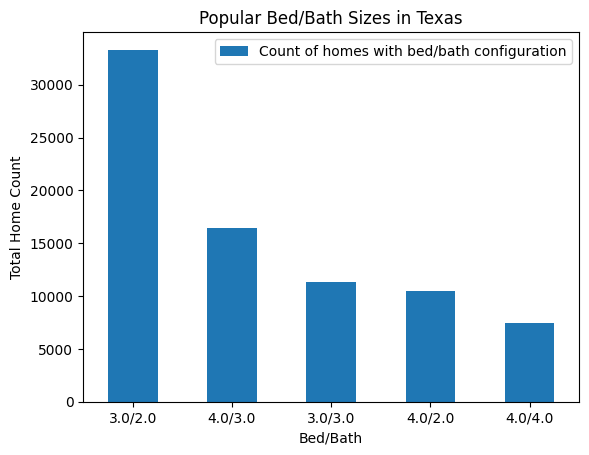

In [ ]:
q2_f.plot(kind='bar',x='bed/bath',y='count', title='Popular Bed/Bath Sizes in '+ state_select)
plt.xlabel('Bed/Bath')
plt.ylabel('Total Home Count')
plt.legend(['Count of homes with bed/bath configuration'])
plt.xticks(rotation=0) # ticks were rotated by deafult, required zeroing out
plt.show()

###**Question 3: What year had the highest value of home sales in selected state w/ graphical display**

In [ ]:
df_filter.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
613411,33968.0,for_sale,99000.0,1.0,1.0,5.0,49388.0,Terlingua,Texas,79852.0,600.0,NaN
656455,88188.0,for_sale,58800.0,NaN,NaN,1.0,841041.0,Orange,Texas,77632.0,NaN,NaN
656456,88188.0,for_sale,58800.0,NaN,NaN,1.0,844563.0,Orange,Texas,77632.0,NaN,NaN
656457,88188.0,for_sale,58800.0,NaN,NaN,1.0,845421.0,Orange,Texas,77632.0,NaN,NaN
656458,88188.0,for_sale,58800.0,NaN,NaN,1.0,859147.0,Orange,Texas,77632.0,NaN,NaN


In [ ]:
q3 = df_filter#[df_filter['status']=='sold'] decided not to filter by sold becuase it limits results to 2 years.
q3.dropna(subset=['prev_sold_date','price'],inplace=True)
q3.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,sold_year
966376,22959.0,for_sale,349000.0,6.0,5.0,4.41,307395.0,Newton,Texas,75966.0,5888.0,2014-06-17,2014
966379,106174.0,for_sale,249500.0,2.0,2.0,1.19,363547.0,Hemphill,Texas,75948.0,1872.0,2022-04-28,2022
966389,4317.0,for_sale,479000.0,5.0,4.0,6.28,840246.0,Newton,Texas,75966.0,4248.0,2022-05-06,2022
966392,100789.0,for_sale,499000.0,4.0,3.0,NaN,230632.0,Burkeville,Texas,75932.0,2320.0,2022-09-26,2022
966505,100789.0,for_sale,179900.0,3.0,2.0,2.23,439804.0,Burkeville,Texas,75932.0,1240.0,2022-01-28,2022


In [ ]:
q3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123941 entries, 966376 to 2047586
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   brokered_by     123893 non-null  float64       
 1   status          123941 non-null  object        
 2   price           123941 non-null  float64       
 3   bed             111833 non-null  float64       
 4   bath            111870 non-null  float64       
 5   acre_lot        118501 non-null  float64       
 6   street          123811 non-null  float64       
 7   city            123929 non-null  object        
 8   state           123941 non-null  object        
 9   zip_code        123941 non-null  float64       
 10  house_size      112122 non-null  float64       
 11  prev_sold_date  123941 non-null  datetime64[ns]
 12  sold_year       123941 non-null  int32         
dtypes: datetime64[ns](1), float64(8), int32(1), object(3)
memory usage: 12.8+ MB


In [ ]:
q3['prev_sold_date']=pd.to_datetime(q3['prev_sold_date'])

In [ ]:
q3['sold_year']=q3['prev_sold_date'].dt.year
q3.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,sold_year
966376,22959.0,for_sale,349000.0,6.0,5.0,4.41,307395.0,Newton,Texas,75966.0,5888.0,2014-06-17,2014
966379,106174.0,for_sale,249500.0,2.0,2.0,1.19,363547.0,Hemphill,Texas,75948.0,1872.0,2022-04-28,2022
966389,4317.0,for_sale,479000.0,5.0,4.0,6.28,840246.0,Newton,Texas,75966.0,4248.0,2022-05-06,2022
966392,100789.0,for_sale,499000.0,4.0,3.0,NaN,230632.0,Burkeville,Texas,75932.0,2320.0,2022-09-26,2022
966505,100789.0,for_sale,179900.0,3.0,2.0,2.23,439804.0,Burkeville,Texas,75932.0,1240.0,2022-01-28,2022


In [ ]:
statsq3=q3.groupby('sold_year')['price'].sum().reset_index()
statsq3['price']=statsq3['price'].round(2)
q3_top=statsq3.sort_values(by='price', ascending=False).head(10) # picking the top 10 most lucrative years and sorting them by price to put into a new variable
q3_top.columns.values[1]='Total Sales'
q3_top

,sold_year,Total Sales
44,2022,2.373654e+10
43,2021,8.931003e+09
41,2019,1.781737e+09
42,2020,1.523491e+09
40,2018,1.515905e+09
39,2017,1.369879e+09
38,2016,1.301531e+09
37,2015,1.179954e+09
36,2014,1.135327e+09
35,2013,1.005319e+09


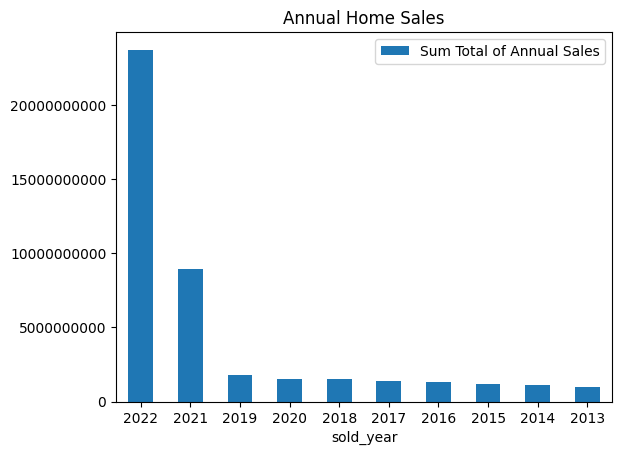

In [ ]:
q3_top.plot(kind='bar', x='sold_year', y='Total Sales')
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(['Sum Total of Annual Sales'])
plt.title('Annual Home Sales')
plt.show()

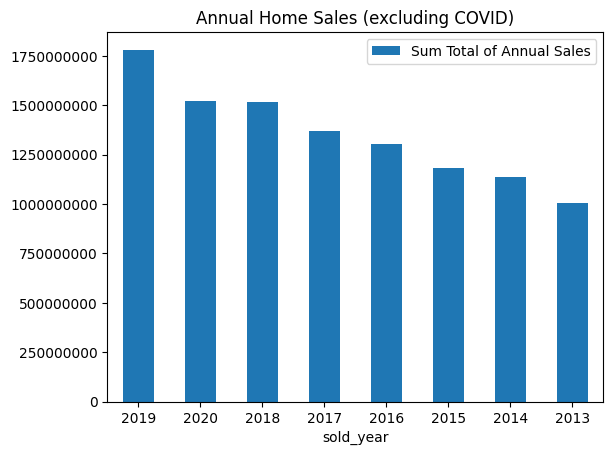

In [ ]:
# For fun lets exclude 2022 and 2021 becasue of the massive Covid increase
q3_covid=q3_top[2:] # excluding covid years
q3_covid.plot(kind='bar', x='sold_year', y='Total Sales')
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Annual Home Sales (excluding COVID)')
plt.legend(['Sum Total of Annual Sales'])
plt.show()


### **Question 4 :What state sold the highest number of homes**

In [ ]:
q4=df.copy()
#Have to reclean data that is unfiltered by state
q4.dropna(subset=['price'],inplace=True)
q4.drop_duplicates(inplace=True)
q4.drop(['street','brokered_by'], axis=1, inplace=True)
#q4.info()
#q4.isnull().sum()
q4.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
0,for_sale,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
q4_sold=q4[q4['status']=='sold']
#q4_sold.head()
q4_sold['count']=''
q4_f=q4_sold.groupby('state').count().reset_index()
q4_f=q4_f[['state','count']]
q4_f.head(1)

<ipython-input-187-d45fd26f27e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4_sold['count']=''


,state,count
0,Alabama,6765


In [ ]:
q4_f=q4_f.sort_values(by='count', ascending=False).reset_index() #Ordering the number of sold homes per state from highest to lowest
q4_f.drop('index', axis=1, inplace=True) #resetting the index creates an index column
q4_f.head()

,state,count
0,California,125013
1,Florida,85592
2,Texas,80548
3,Washington,36923
4,Arizona,34126


In [ ]:
print("The state with the highest number of sold homes is {} with an impressive number of homes sold at {}.".format(q4_f['state'][0],q4_f['count'][0]))

The state with the highest number of sold homes is California with an impressive number of homes sold at 125013.


In [ ]:
# Alternative method to create a series containing just the top value
q4_f2=q4_f.iloc[0] #Pulling the state with highest count of sold homes

In [ ]:
print("The state with the highest number of sold homes is {} with an impressive number of homes sold at {}.".format(q4_f2[0],q4_f2[1]))

The state with the highest number of sold homes is California with an impressive number of homes sold at 103085.


### **Question 5 What state has the highest number of active listings.**




In [ ]:
q5=df.copy()
q5.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
q5_sale =q5[q5['status']=='for_sale'] # filtering for only active listings
q5_sale['status'].value_counts() #Check for values in status

status
for_sale    1389306
Name: count, dtype: int64

In [ ]:
q5_f=q5_sale.groupby('state').count().reset_index()
q5_f=q5_f[['state','status']]
q5_f.columns.values[1]='Active Listing Count'
q5_f=q5_f.sort_values(by='Active Listing Count', ascending=False).reset_index()
q5_f.drop('index', axis=1, inplace=True)
q5_f.head()

,state,Active Listing Count
0,Florida,161216
1,Texas,122172
2,California,101034
3,New York,71378
4,North Carolina,57129


In [ ]:
print("The state with the highest number of active listings is {} with an impressive number of active listings at {}.".format(q5_f['state'][0],q5_f['Active Listing Count'][0]))

The state with the highest number of active listings is Florida with an impressive number of active listings at 161216.


###**Machine Learning Model: Simple Linear Regression**


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
mldf=df_filter.copy() #machine learning df

In [ ]:
mldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127658 entries, 413549 to 1759366
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          127658 non-null  object 
 1   price           127658 non-null  float64
 2   bed             127658 non-null  float64
 3   bath            127658 non-null  float64
 4   acre_lot        127658 non-null  float64
 5   city            127658 non-null  object 
 6   state           127658 non-null  object 
 7   zip_code        127658 non-null  float64
 8   house_size      127658 non-null  float64
 9   prev_sold_date  109273 non-null  object 
dtypes: float64(6), object(4)
memory usage: 10.7+ MB


In [ ]:
mldf.dropna(subset=['house_size','bed','bath','acre_lot','zip_code','price','city'],inplace=True) # Relavant data to be used for analysis

In [ ]:
mldf.isnull().sum()

,0
status,0
price,0
bed,0
bath,0
acre_lot,0
city,0
state,0
zip_code,0
house_size,0
prev_sold_date,39203


In [ ]:
mldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127658 entries, 413549 to 1759366
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          127658 non-null  object 
 1   price           127658 non-null  float64
 2   bed             127658 non-null  float64
 3   bath            127658 non-null  float64
 4   acre_lot        127658 non-null  float64
 5   city            127658 non-null  object 
 6   state           127658 non-null  object 
 7   zip_code        127658 non-null  float64
 8   house_size      127658 non-null  float64
 9   prev_sold_date  109273 non-null  object 
dtypes: float64(6), object(4)
memory usage: 10.7+ MB


In [ ]:
mldf.head(3)

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
413549,for_sale,285000.0,3.0,2.0,0.26,Yulee,Florida,32097.0,1635.0,2014-01-24
413553,for_sale,340000.0,3.0,2.0,0.17,Yulee,Florida,32097.0,1503.0,2017-12-05
413554,for_sale,649000.0,3.0,1.0,0.59,Fernandina Beach,Florida,32034.0,1896.0,NaN


In [ ]:
#Encoding catergorical data
# One hot encoding vs label encoding https://www.statology.org/label-encoding-vs-one-hot-encoding/
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le=LabelEncoder()
mldf['city']=le.fit_transform(mldf['city']) #assigns a numerical value to a categorical one so that it can be analyzed

#alternative method: mldf[['city']]=mldf[['city']].apply(LabelEncoder().fit_transform)
# if multiple columns need conversion #mldf[['city','zip_code']]=mldf[['city','zip_code']].apply(LabelEncoder().fit_transform)

In [ ]:
X= mldf[['bed','bath','house_size','city']] # Assigning independent variables which will be used to determine the price
y= mldf['price'] # assigning dependent variable or target which I am trying to predict

In [ ]:
mldf['city'].value_counts()
mldf.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
613411,for_sale,99000.0,1.0,1.0,5.00,1261,Texas,79852.0,600.0,NaN
941501,for_sale,208000.0,4.0,2.0,1.07,1219,Texas,79782.0,1460.0,NaN
966355,for_sale,259900.0,2.0,1.0,0.23,182,Texas,75932.0,750.0,NaN
966361,for_sale,179000.0,3.0,2.0,3.61,182,Texas,75932.0,1956.0,NaN
966362,for_sale,95000.0,2.0,2.0,3.28,664,Texas,75956.0,784.0,NaN


In [ ]:
mldf.drop(['status','prev_sold_date','state'], axis=1, inplace=True) #Dropping irrelevant and nonnumeric columns.

KeyError: "['status', 'prev_sold_date', 'state'] not found in axis"

<Axes: >

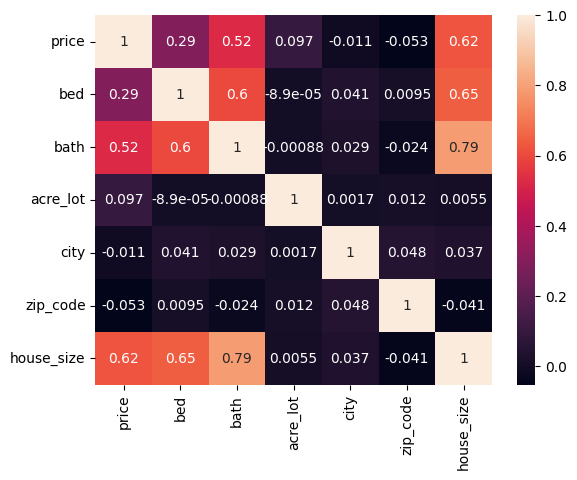

In [ ]:
sns.heatmap(mldf.corr(), annot=True) #Shows correlation between categories, annot displays values in blocks

In [ ]:
print(X.shape) #how many total rows, columns we have
print(y.shape)

(145377, 4)
(145377,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Assigning training and testing splits to the dataset. 80% will be used for training, 20% for testing
#random state is the seed value. i.e the value a random generator will use as a baseline so that results can be duplicated.
#Essentially makes it so you use the same data each time you run the code.
#If no random state is assigned different portions of the dataset will be used each time resulting in different end results


In [ ]:
print(X_train.shape) #how many rows are used to train the data ex: 60% (test_size=.4(40%) for testing). 816376/1360627 =60%
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(116301, 4)
(116301,)
(29076, 4)
(29076,)


In [ ]:
lm = LinearRegression() # used to fit linear regression model
lm.fit(X_train,y_train) #Training the model with the data. Must ensure there are no NaN/Null values

LinearRegression()

In [ ]:
predict=lm.predict(X_test) #creating a prediction array for houseing prices

In [ ]:
#Can test various situations for preditction by inputting different values
lm.predict(([3,2,1000,],[5,3,1000],[10,5,1000]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but LinearRegression is expecting 4 features as input.

In [ ]:
predict

array([129385.15113035, 325926.20888965, 413384.95158496, ...,
       631380.78957811, 304910.22297361, 889498.59459003])

In [ ]:
lm.score(X_test,y_test) # Checks the accuracy of the model as a percentage .34= 34%. Better case >80%

0.40042529240222724

In [ ]:
from sklearn.metrics import r2_score # Another way to check the accuracy
r2_score(y_test,predict)
# y intecept lm.intercept_
# coefficient lm.coef_

0.40042529240222724

Based on the score this model is not very accurate at about 31% accuracy. To gain more clarity we'll graph the model



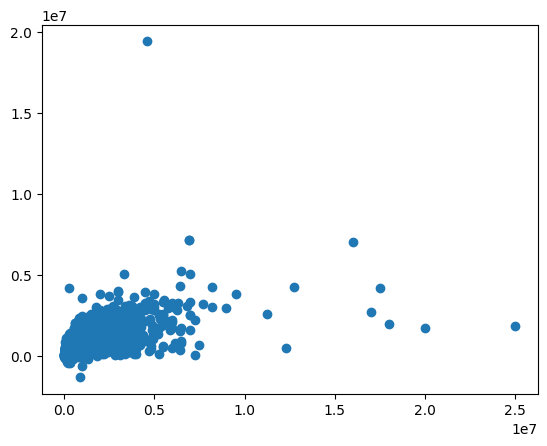

In [ ]:
plt.scatter(y_test, predict) # Comparing the prediction array to the actual vaules from y_test
#plt.plot(y_test, predict, color='red')

We can see that there are some outliers in the data.

In [ ]:
#ldf_head=mldf.drop(['state','status','city','prev_sold_date'], axis=1) #dropping all str/objects from .info() to create heatmap showing correlation
#sns.heatmap(mldf_head.corr(), annot=True)

In [ ]:
mldf2=mldf.copy() #Copying the data to a new dataframe for futher filtering and analysis

In [ ]:
#looking for obvious outliers in the dependent variables. We're looking at residential so anthing over  7 bed/bath at the most is excessive
print(mldf2['bed'].value_counts().sort_index(ascending=True))
print(mldf2['bath'].value_counts().sort_index(ascending=True))

bed
1.0      2131
2.0     12856
3.0     68327
4.0     50055
5.0     10119
6.0      1411
7.0       193
8.0       131
9.0        40
10.0       25
11.0       18
12.0       24
13.0        4
14.0        3
15.0        2
16.0        6
17.0        4
18.0        2
19.0        2
20.0        2
21.0        1
22.0        2
24.0        3
25.0        1
27.0        1
28.0        2
29.0        2
30.0        1
31.0        2
32.0        1
36.0        1
40.0        1
41.0        1
45.0        1
93.0        1
99.0        1
Name: count, dtype: int64
bath
1.0     11208
2.0     65355
3.0     43163
4.0     18319
5.0      4604
6.0      1533
7.0       633
8.0       279
9.0       133
10.0       58
11.0       25
12.0       22
13.0        5
14.0        9
15.0       12
16.0        2
18.0        3
20.0        6
21.0        3
25.0        2
26.0        1
29.0        2
Name: count, dtype: int64


In [ ]:
#Trying to imporve accuracy by removing outliers
mldf2=mldf2[mldf2['bath']<=7]
mldf2=mldf2[mldf2['bed']<=7]
mldf2['bed'].value_counts()

,count
bed,
3.0,68325
4.0,50028
2.0,12855
5.0,9927
1.0,2131
6.0,1272
7.0,143


In [ ]:
mldf2['house_size'].value_counts().nlargest(10) #pulling top 10 largest values

,count
house_size,
1200.0,420
1800.0,402
1600.0,366
1216.0,363
1500.0,332
1568.0,289
1400.0,274
1680.0,271
1456.0,265


In [ ]:
mldf2['city'].value_counts().nlargest(10) #Top 10 most common cities by code

,count
city,
579,18964
316,6636
441,6151
1125,5323
385,3571
641,3111
1210,2183
281,2141
272,2097


In [ ]:
mldf2['zip_code'].value_counts().nlargest(10) #Top 10 most common zip codes

,count
zip_code,
77494.0,991
77493.0,943
77007.0,897
77433.0,832
77346.0,794
77008.0,772
79928.0,757
75126.0,753
79938.0,749


#Correct the mode() not pulling the most repeated

In [ ]:
#Prompting user to inpt specific zipcode they are interested in or will default to the zipcode with the most data
user_zipselect = input("Is there a specific you would like to anaylze? (Y/N): ")
if (user_zipselect in ['Y','y']):
  zipselect =int(input("Which zipcode would you like to analyze: "))  # Changing type of input to int or float
  while zipselect not in mldf2['zip_code'].values:  #Alt:  while zipselect not in mldf2['zip_code'].uniqe()
    print("The zipcode you selected is invalid. Please check spelling and try again.")
    zipselect = int(input("Which zipcode would you like to analyze: "))
  else:
    print('The zipcode you selected is {}'.format(zipselect))
    pass;

elif (user_zipselect== 'N') or (user_zipselect=='n'):
  zipselect= int(mldf2['zip_code'].mode()[0])
  print('The zipcode with the most data will be used which is {}'.format(zipselect))
else:
  print('Please enter a valid input')
  pass

Is there a specific you would like to anaylze? (Y/N): n
The zipcode with the most data will be used which is 77494


In [ ]:
#Imporving accurracy by limiting search to specific city or zip code
#mldf2=mldf2[mldf2['city']=='Jacksonville']
#mldf2=mldf2[mldf2['zip_code']==mldf2['zip_code'].mode()[0]]
mldf2=mldf2[mldf2['zip_code']==zipselect]

In [ ]:
#Clearing any nulls
mldf2.dropna(subset=['price','house_size','bed','bath','acre_lot'],inplace=True)
mldf2.reset_index(inplace=True)
mldf2.isnull().sum()

,0
index,0
price,0
bed,0
bath,0
acre_lot,0
city,0
zip_code,0
house_size,0


In [ ]:
x2= mldf2[['bed','bath','acre_lot','house_size']]
y2=mldf2['price']

In [ ]:
mldf2.head()

,index,price,bed,bath,acre_lot,city,zip_code,house_size
0,1078885,350000.0,3.0,3.0,0.15,641,77494.0,2243.0
1,1078888,489990.0,4.0,3.0,0.14,641,77494.0,2684.0
2,1078889,550000.0,4.0,4.0,0.17,641,77494.0,3560.0
3,1078890,555000.0,4.0,4.0,0.21,641,77494.0,3097.0
4,1079789,475000.0,4.0,4.0,0.14,641,77494.0,3613.0


In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [ ]:
lm2 = LinearRegression()
lm2.fit(x2_train,y2_train)

LinearRegression()

In [ ]:
from matplotlib import pyplot as plt
print(x2_train.shape)
print(y2_train.shape)
print(x2_test.shape)
print(y2_test.shape)

(792, 4)
(792,)
(199, 4)
(199,)


In [ ]:
predict2=lm2.predict(x2_test)

In [ ]:
r2_score(y2_test,predict2)

0.8218400363706402

Model accuracy has greatly imporved for this specific zipcode.

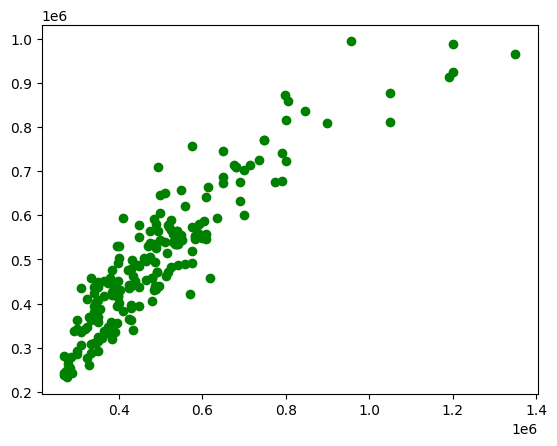

In [ ]:
plt.scatter(y2_test, predict2, color ='green')
#plt.plot(y2_test, predict, color='red')

In [ ]:
#I wanted create a df to compare the predicted values and the actual values with the corresponding features
#print(predict2) # very long array
print(x2_test)
superframe=x2_test.copy()
superframe['predictions']=predict2
superframe['actual_values']=y2_test
superframe['averages']=superframe['predictions']/superframe['actual_values'] # additional check for accurary for each instance
superframe.head(10)

     bed  bath  acre_lot  house_size
213  3.0   2.0      0.17      1864.0
331  3.0   3.0      0.27      3173.0
501  4.0   4.0      0.29      4341.0
309  4.0   4.0      0.14      3282.0
88   4.0   4.0      0.27      3972.0
..   ...   ...       ...         ...
705  3.0   2.0      0.18      2280.0
305  4.0   4.0      0.14      2853.0
808  4.0   4.0      0.21      3474.0
237  3.0   3.0      0.14      2436.0
754  4.0   3.0      0.22      2188.0

[199 rows x 4 columns]


,bed,bath,acre_lot,house_size,predictions,actual_values,averages
213,3.0,2.0,0.17,1864.0,291784.681934,349900.0,0.833909
331,3.0,3.0,0.27,3173.0,534073.923226,485000.0,1.101183
501,4.0,4.0,0.29,4341.0,724207.758770,735000.0,0.985317
309,4.0,4.0,0.14,3282.0,534509.802475,540033.0,0.989772
88,4.0,4.0,0.27,3972.0,664917.536057,615000.0,1.081167
535,3.0,2.0,0.13,2085.0,316326.616827,350000.0,0.903790
280,4.0,3.0,0.20,2068.0,340160.027380,434910.0,0.782139
107,2.0,3.0,0.17,1908.0,338414.361381,365000.0,0.927163
59,4.0,4.0,0.20,3271.0,545528.727969,550000.0,0.991870
506,4.0,2.0,0.14,1753.0,254656.997270,284900.0,0.893847


In [ ]:
# looking at a specific row values. 1042 is very close to 100% accuracy
#superframe.loc[index#]

##Note to self by minimzing the dataset to certain zipcodes or citites the models accuracy greatly imporves. It could mean throughout the entire state or even in certain cities there are to many outliners or variance in range of prices. Best results are by zipcode. When comparaing Miami to Jacksonville, jacksonville model has better accracry.

(0.0, 11075626.218305487)

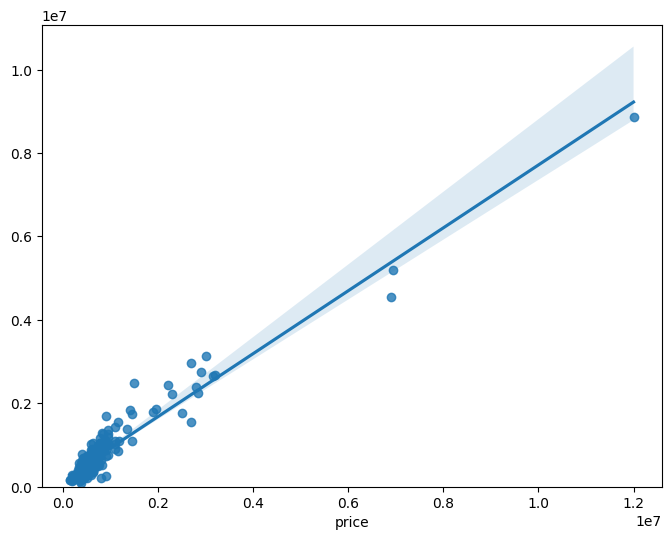

In [ ]:
import seaborn as sns
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(y=predict, x=y2_test, data=mldf2)
plt.ylim(0,)